In [1]:
# Harbinger Package
# version 1.0.50

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/examples/jupyter_harbinger.R")

#loading Harbinger
load_harbinger() 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
“replacing previous import ‘dplyr::filter’ by ‘stats::filter’ when loading ‘daltoolbox’”

Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: harbinger

Warning message:
“replacing previous import ‘TSPred::minmax’ by ‘daltoolbox::minmax’ when loading ‘harbinger’”


In [2]:
#loading the example database
data(har_examples)

In [3]:
#Using the time series 1 
dataset <- har_examples[[14]]
head(dataset)

,serie,event
,<dbl>,<lgl>
1,-1.1597821,FALSE
2,-1.5782775,FALSE
3,-1.5653926,FALSE
4,-0.7182375,FALSE
5,0.6003753,FALSE
6,0.1899022,FALSE


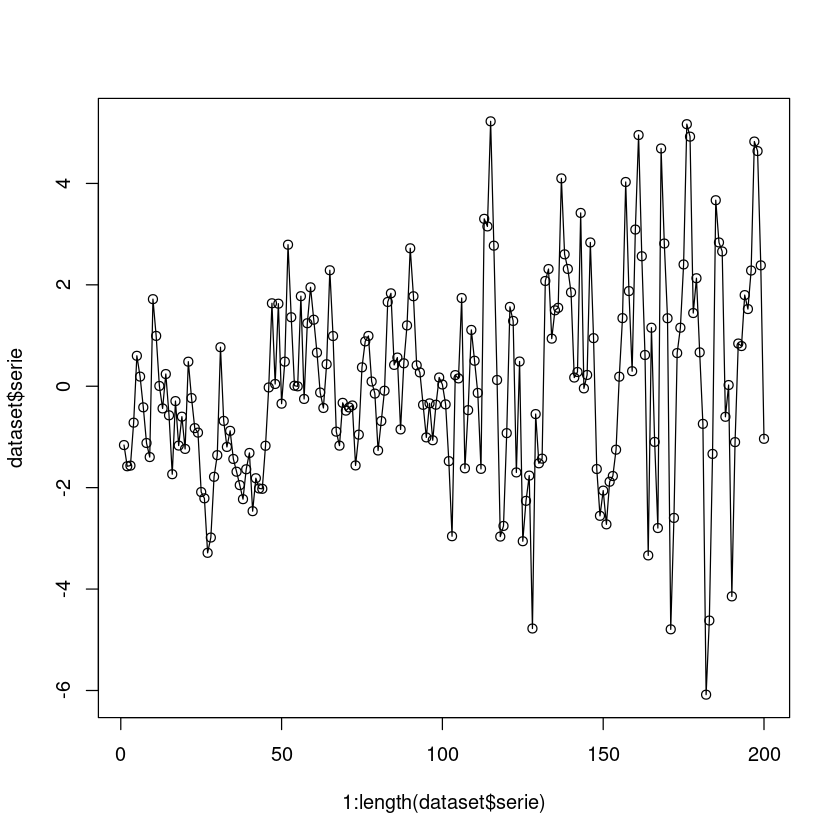

In [4]:
#ploting serie #1

plot(x = 1:length(dataset$serie), y = dataset$serie)
lines(x = 1:length(dataset$serie), y = dataset$serie)

In [5]:
# establishing change finder arima method 
  model <- change_point_garch()

In [6]:
# fitting the model
  model <- fit(model, dataset$serie)

In [7]:
# making detections using fbiad
  detection <- detect(model, dataset$serie)

In [8]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

  idx event         type
1 101  TRUE change_point
2 169  TRUE change_point
3 172  TRUE change_point


In [9]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      0     3    
FALSE     1     196  


Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


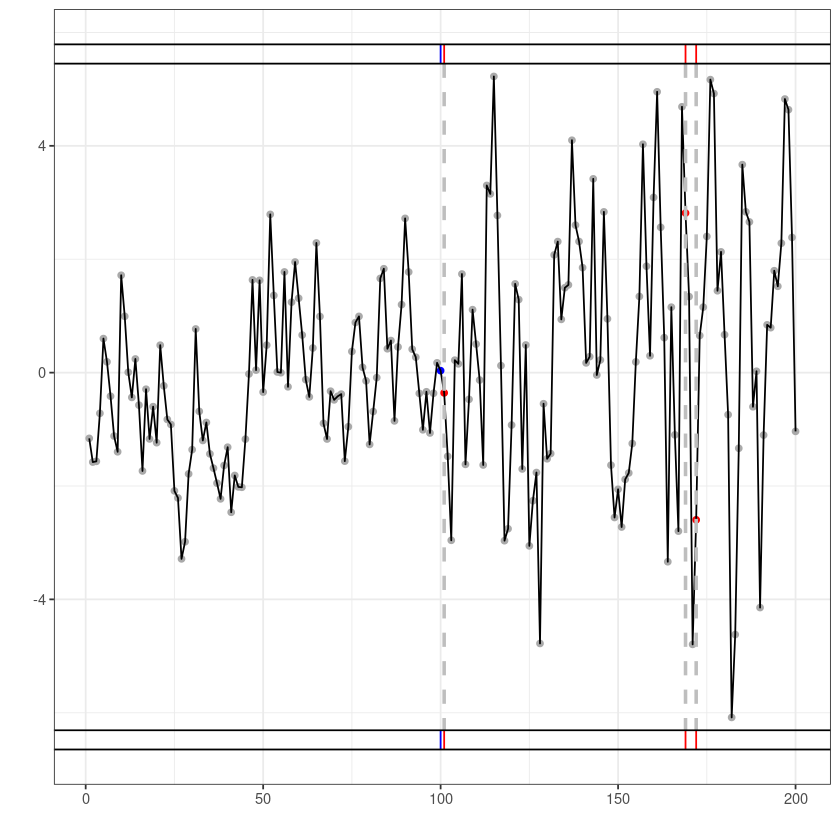

In [10]:
# ploting the results
  grf <- plot.harbinger(model, dataset$serie, detection, dataset$event)
  plot(grf)